#`FrozenLake-v1`

#Task
The "FrozenLake-v1" environment is part of the Toy Text environments in the gymnasium library. In this environment, the task is to navigate a frozen lake from the starting point to the goal without falling into any holes. Here are the details of the environment:

###Action Space:
* The action space is discrete with four possible actions represented by integers: {0: Move left, 1: Move down, 2: Move right, 3: Move up}.


###Observation Space:
* The observation space is discrete with 16 possible states represented by integers.
* The current position of the player is calculated as current_row * nrows + current_col, where both row and col start at 0.

###Starting State:
* The episode starts with the player at location [0, 0], which corresponds to state [0].

###Rewards:
* If the player reaches the goal, a reward of +1 is given.
* Falling into a hole or stepping on a frozen tile results in a reward of 0.

###Episode End:
* The episode ends under the following conditions:
  * The player falls into a hole.
  * The player reaches the goal at the position [max(nrow)-1, max(ncol)-1].
  * When using the time_limit wrapper, the episode is truncated after a certain number of steps (100 for a 4x4 environment, 200 for an 8x8 environment).

###Additional Information:

* The lake is slippery, meaning that the player may not always move in the intended direction due to the slippery nature of the ice.
* Randomly generated worlds always have a path to the goal.
* The transition probability for each state can be accessed through the 'p'key in the returned dictionary from the step() and reset() methods.
* The is_slippery attribute provides information about the transition probabilities.
* You can now interact with the environment using the step() and reset() methods, and access its properties and methods to implement your reinforcement learning algorithm.

To train the agent, we can use Q-learning, a popular reinforcement learning algorithm. The Q-learning algorithm maintains a Q-table that maps state-action pairs to expected rewards. The agent learns by iteratively updating the Q-values based on the observed rewards and selecting actions using an epsilon-greedy policy to balance exploration and exploitation.

To implement the reinforcement learning problem with the FrozenLake-v1 environment, you need to:

* Import the necessary libraries, including Gymnasium and matplotlib and NumPy.
* Create the FrozenLake-v1 environment using the Gym library.
* Initialize the Q-table with random values.
* Implement the Q-learning algorithm by defining the necessary functions:
 * Choose an action based on the current state using an epsilon-greedy policy.
 * Execute the chosen action and observe the next state and the corresponding
   reward.
 * Update the Q-value for the current state-action pair based on the observed reward and the maximum Q-value of the next state.
* Repeat the above steps until convergence or a maximum number of episodes.
* Evaluate the trained agent by running episodes and calculating the average reward over multiple episodes.
* Fine-tune the hyperparameters (learning rate, discount rate, exploration rate,decay rate for exploration prob) to find the optimal values that maximize the average reward.

By implementing the Q-learning algorithm and adjusting the hyperparameters, you can train the agent to navigate the FrozenLake environment effectively and maximize its rewards while avoiding falling into holes.


In [ ]:
!pip install gymnasium
!pip install matplotlib
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 14.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Implements the Q-Learning algorithm
The Q-Learning algorithm is a model-free reinforcement learning algorithm that learns the optimal action-value function (Q-function) for a given environment. In the context of your code, the Q-Learning algorithm is implemented as follows:

###Q-Table Initialization:
* The Q-Table is initialized using the initialize_q_table function. The size of the Q-Table is determined by the number of states and actions in the environment, which are obtained from env.observation_space.n and env.action_space.n, respectively.
* The Q-Table is a 2D array, where each row corresponds to a state and each column corresponds to an action. The values in the Q-Table represent the expected future rewards for taking a specific action in a given state.

###Policy Selection:
* The greedy_policy function is used to select the action with the highest Q-value for a given state. This is the exploitation step, where the agent selects the action that is currently estimated to be the best.

###Epsilon-Greedy Policy:

* The epsilon_greedy_policy function is used to select an action using the epsilon-greedy strategy. With a probability of epsilon, a random action is chosen to encourage exploration. With a probability of 1 - epsilon, the greedy action is chosen to exploit the current knowledge.

###Training Loop:

* The train function implements the training loop. It iterates over a specified number of episodes (num_episodes).
* For each episode, the agent starts in the initial state and performs actions in the environment until reaching a terminal state (either reaching the goal or falling into a hole) or exceeding the maximum number of steps (max_steps).
* At each step, the agent selects an action using the epsilon-greedy policy and performs the action in the environment.
* The new state, reward, termination status, and other information are obtained from the environment.
*The Q-Table is updated using the Q-Learning update rule:
 * Q[state][action] = Q[state][action] + learning_rate * (reward + gamma * max(Q[new_state]) - Q[state][action])
 * Here, learning_rate is the step size or learning rate, and gamma is the discount factor that balances immediate and future rewards.
* The cumulative reward for the episode is updated, and the episode terminates if a terminal state is reached or the maximum number of steps is exceeded.

###Evaluation:

* The evaluate function is used to evaluate the learned policy after training. It runs a specified number of evaluation episodes (evaluation_episodes) and calculates the mean and standard deviation of the rewards obtained.

###Visualization:

* The code includes visualization functions to plot the training performance, exploration rate, and steps per episode using matplotlib.
* The plot_policy function visualizes the learned policy by plotting arrows indicating the optimal actions for each state in the environment.

The Q-Learning algorithm learns the optimal policy through repeated interactions with the environment, updating the Q-Table based on observed rewards. Over time, the agent learns to choose actions that maximize the expected cumulative reward, leading to better performance in the given environment.

In [ ]:
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt

def initialize_q_table(state_space, action_space):
    return np.zeros((state_space, action_space))

def greedy_policy(Qtable, state):
    return np.argmax(Qtable[state][:])

def epsilon_greedy_policy(q_table, state, epsilon, env):
    if random.uniform(0, 1) > epsilon:
        return greedy_policy(q_table, state)
    else:
        return env.action_space.sample()

def plot_policy(q_table, env):
    policy = np.argmax(q_table, axis=1)
    policy_characters = {0: '←', 1: '↓', 2: '→', 3: '↑'}

    nrow = env.nrow
    ncol = env.ncol
    policy_grid = np.full((nrow, ncol), '', dtype=str)

    color_map = plt.get_cmap('viridis')
    policy_colors = np.full((nrow, ncol, 4), 0, dtype=float)

    for state, action in enumerate(policy):
        row = state // ncol
        col = state % ncol
        policy_grid[row, col] = policy_characters[action]
        policy_colors[row, col] = color_map(float(action) / len(policy_characters))

    start_state = np.where(env.desc == b'S')
    goal_state = np.where(env.desc == b'G')
    policy_grid[start_state] = 'S'
    policy_grid[goal_state] = 'G'
    policy_colors[start_state] = [0, 0, 1, 1] # Start state color: blue
    policy_colors[goal_state] = [1, 0, 0, 1] # Goal state color: red

    fig, ax = plt.subplots()
    ax.matshow(np.ones_like(policy_grid, dtype=float), cmap='Greys', extent=(0, ncol, nrow, 0))

    for (i, j), character in np.ndenumerate(policy_grid):
        ax.text(j, i, character, ha='center', va='center', color='#E7DF43', fontsize=12, fontweight='bold')
        ax.add_patch(plt.Rectangle((j, i), 1, 1, facecolor=policy_colors[i, j]))

    plt.xticks(np.arange(0, ncol, 1))
    plt.yticks(np.arange(0, nrow, 1))
    plt.grid(color='k', linewidth=1)

    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    plt.title("Learned Policy")
    plt.show()
'''The start state is colored blue, and the goal state is colored red.
The actions are colored with shades of the viridis colormap.'''

'The start state is colored blue, and the goal state is colored red. \nThe actions are colored with shades of the viridis colormap.'

The goal of Q-Learning is to find an optimal policy that maximizes the expected cumulative rewards over time.

In the code, the Q-Table is used to store the Q-values, which represent the expected cumulative rewards for each state-action pair in the environment. The Q-Table is initially initialized with zeros.

The `train` function is responsible for training the agent. It iterates over a specified number of episodes, during which the agent interacts with the environment. In each episode, the agent selects actions based on an epsilon-greedy policy, which balances exploration and exploitation. The exploration rate (epsilon) gradually decreases over time.

The agent observes the rewards obtained from the environment and updates the Q-Table accordingly. The Q-Value update follows the Q-Learning update rule, which incorporates the immediate reward received, the maximum Q-Value of the next state, a learning rate, and a discount factor.

Throughout the training process, the cumulative rewards, steps per episode, and exploration rates are recorded for analysis and monitoring the agent's progress.
train Function:

The `train` function is the main training loop of the Q-Learning algorithm.
It takes the following parameters:

`num_episodes`: The number of episodes to train the agent.
`min_epsilon`: The minimum exploration rate (epsilon) used in the epsilon-greedy policy.
`max_epsilon`: The maximum exploration rate (epsilon) used in the epsilon-greedy policy.
`decay_rate`: The rate at which the exploration rate decays over episodes.
`learning_rate`: The learning rate (alpha) used to update the Q-values.
`env`: The environment used for training.
`max_steps`: The maximum number of steps allowed per episode during training.
`q_table`: The Q-Table to be updated and trained.
`gamma`: The discount factor that balances immediate and future rewards.

The function initializes variables to store cumulative rewards (cumulative_reward), cumulative rewards over episodes (cumulative_rewards), steps taken per episode (steps_per_episode), and exploration rates (epsilons).
It then iterates over the specified number of training episodes.
For each episode, it updates the exploration rate (epsilon) using a decay function based on the episode number.

* The agent starts in the initial state obtained from the environment's reset function.
* It performs actions using the epsilon-greedy policy and interacts with the environment.
* The Q-Table is updated based on the observed reward using the Q-Learning update rule.
* The cumulative reward and episode statistics are recorded for monitoring the agent's progress.
* After training, the cumulative rewards, steps per episode, and exploration rates are returned as the training results.

The `evaluate` function is used to assess the performance of the learned policy. It runs a specified number of evaluation episodes, during which the agent selects actions based on a greedy policy, always choosing the action with the highest Q-Value. The total rewards obtained in each evaluation episode are recorded and used to calculate the mean and standard deviation of the rewards.

`evaluate Function`:

The evaluate function is used to assess the performance of the learned policy after training.

It takes the following parameters:
`env`: The environment used for evaluation.
`max_episode_steps`: The maximum number of steps allowed per episode during evaluation.
`evaluation_episodes`: The number of episodes to run for evaluation.
`q_table`: The Q-Table containing the learned Q-values.
`seed`: An optional parameter that can be used to set the seed for reproducibility.

* It runs a loop for the specified number of evaluation episodes.
* In each episode, the agent performs actions based on the greedy policy (selecting the action with the highest Q-value) using the greedy_policy function.
* The agent interacts with the environment until a terminal state is reached or the maximum number of steps is exceeded.
* The total rewards obtained in each episode are stored in the episode_rewards list.

Finally, the mean and standard deviation of the episode rewards are calculated and returned as the evaluation results.
The code also includes functions to plot the training performance, exploration rate, and steps per episode.

In [ ]:
def evaluate(env, max_episode_steps, evaluation_episodes, q_table, seed):
    episode_rewards = []
    for episode in range(evaluation_episodes):
        if seed:
            state, _ = env.reset(seed=seed[episode])
        else:
            state, _ = env.reset()
        total_rewards = 0

        for _ in range(max_episode_steps):
            action = greedy_policy(q_table, state)
            new_state, reward, terminated, truncated, _ = env.step(action)
            total_rewards += reward

            if terminated or truncated:
                break
            state = new_state
        episode_rewards.append(total_rewards)

    mean_reward = np.mean(episode_rewards)
    std_reward = np.std(episode_rewards)

    return mean_reward, std_reward

def train(num_episodes, min_epsilon, max_epsilon, decay_rate, learning_rate, env, max_steps, q_table,gamma):
    cumulative_reward = 0
    cumulative_rewards = []
    steps_per_episode = []
    epsilons = []  # Store exploration rates

    for episode in range(num_episodes):
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
        epsilons.append(epsilon)  # Append the current exploration rate
        state, _ = env.reset()
        terminated = False
        truncated = False
        episode_reward = 0  # Initialize episode reward

        for step in range(max_steps):
            action = epsilon_greedy_policy(q_table, state, epsilon, env)
            new_state, reward, terminated, truncated, _ = env.step(action)
            q_table[state][action] = q_table[state][action] + learning_rate * (
                reward + gamma * np.max(q_table[new_state]) - q_table[state][action]
            )

            episode_reward += reward  # Accumulate reward for the current episode

            if terminated or truncated:
                cumulative_reward += reward
                cumulative_rewards.append(cumulative_reward)
                steps_per_episode.append(step + 1)
                break

            state = new_state


        # print(f"Average training steps per episode: {avg_steps_per_episode}")

        if (episode + 1) % 100 == 0:
            avg_steps_per_episode = sum(steps_per_episode[-100:]) / 100
            print(f"Episode {episode + 1}: Total rewards {cumulative_reward}, Steps taken {step + 1}, "
                  f"Average steps per episode (last 100 episodes): {avg_steps_per_episode}")


    avg_sum_of_steps = sum(steps_per_episode) / num_episodes
    print(f"Average sum of steps across all episodes: {avg_sum_of_steps}")
    return cumulative_rewards, steps_per_episode, epsilons  # Return epsilons along with other results



# Experimenting with non-slippery frozen lake environment
Our objective is to investigate the impact of deterministic environments on the outcomes of reinforcement learning. To achieve this, we will conduct a series of experiments using the non-slippery variant of the "Frozen Lake" environment. By eliminating stochasticity in the agent's movement, we can transform the environment into a fully deterministic state. This configuration will provide valuable insights into how the certainty of actions influences the agent's learning trajectory and overall performance.

To establish the foundation for these experiments, we have predefined a set of hyperparameters. The total number of training episodes is set to 10,000, allowing the agent to learn and refine its strategies over an extended period. The learning rate is configured to 0.6, striking a balance between exploration and exploitation of learned policies. Each training episode is limited to a maximum of 200 steps, ensuring efficient learning within a reasonable timeframe. We employ a discounting rate for future rewards (gamma) of 0.9, prioritizing immediate rewards in the agent's decision-making process.

Regarding exploration, our strategy starts with a maximum exploration probability (epsilon) of 1.0. This high exploration rate enables the agent to thoroughly explore the environment at the beginning of training. However, epsilon gradually decays exponentially at a rate of 0.00005, ultimately reaching a minimum value of 0.01. This decay ensures that the agent maintains a minimal level of exploration throughout the training process, enabling a balance between exploration and exploitation of the learned policies.

We will utilize the Gym library to create the "Frozen Lake" environment with an 8x8 grid and the non-slippery variant. The environment will be rendered in RGB array format for visualization purposes. The state space of the environment is determined by state_space = env.observation_space.n, while the action space is given by action_space = env.action_space.n.

Furthermore, we will evaluate the performance of the learned policy by conducting 100 evaluation episodes. To ensure reproducibility, we can provide a list of evaluation seed values if desired.

Overall, these experiments will shed light on the influence of determinism in the "Frozen Lake" environment and how it affects the agent's learning process and final performance.

In [ ]:
env = gym.make("FrozenLake-v1", map_name="8x8", is_slippery=False, render_mode="rgb_array")
state_space = env.observation_space.n
action_space = env.action_space.n
training_episodes = 10000
learning_rate = 0.6
max_episode_steps = 200
gamma = 0.95
evaluation_seed = []

max_epsilon = 1.0
min_epsilon = 0.05
decay_rate = 0.00005

evaluation_episodes = 100

In [ ]:
# Train and evaluate the agent
q_table = initialize_q_table(state_space, action_space)
cumulative_rewards, steps_per_episode, epsilons = train(training_episodes, min_epsilon, max_epsilon, decay_rate, learning_rate, env, max_episode_steps, q_table,gamma)
mean_reward, std_reward = evaluate(env, max_episode_steps, evaluation_episodes, q_table, evaluation_seed)


mean_reward, std_reward = evaluate(env, max_episode_steps, evaluation_episodes, q_table, evaluation_seed)
print(f"Mean Reward: {mean_reward}, Std Reward: {std_reward}")

Episode 100: Total rewards 0.0, Steps taken 43, Average steps per episode (last 100 episodes): 33.44
Episode 200: Total rewards 0.0, Steps taken 14, Average steps per episode (last 100 episodes): 30.07
Episode 300: Total rewards 0.0, Steps taken 79, Average steps per episode (last 100 episodes): 32.26
Episode 400: Total rewards 0.0, Steps taken 40, Average steps per episode (last 100 episodes): 31.1
Episode 500: Total rewards 0.0, Steps taken 59, Average steps per episode (last 100 episodes): 28.91
Episode 600: Total rewards 0.0, Steps taken 11, Average steps per episode (last 100 episodes): 30.49
Episode 700: Total rewards 0.0, Steps taken 39, Average steps per episode (last 100 episodes): 32.17
Episode 800: Total rewards 0.0, Steps taken 11, Average steps per episode (last 100 episodes): 30.09
Episode 900: Total rewards 1.0, Steps taken 44, Average steps per episode (last 100 episodes): 36.55
Episode 1000: Total rewards 1.0, Steps taken 77, Average steps per episode (last 100 episode

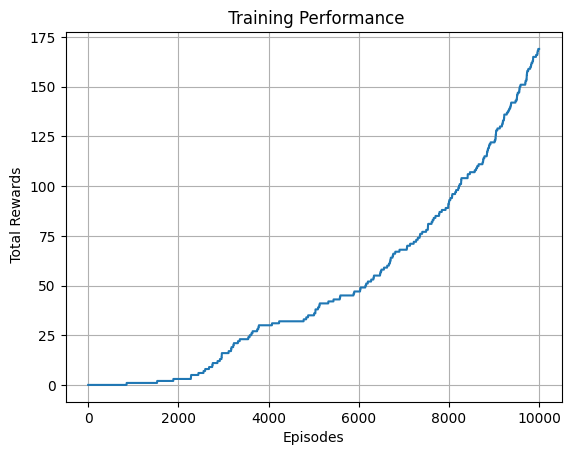

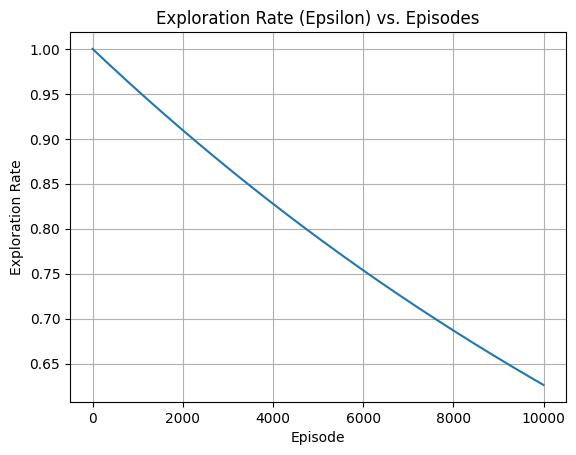

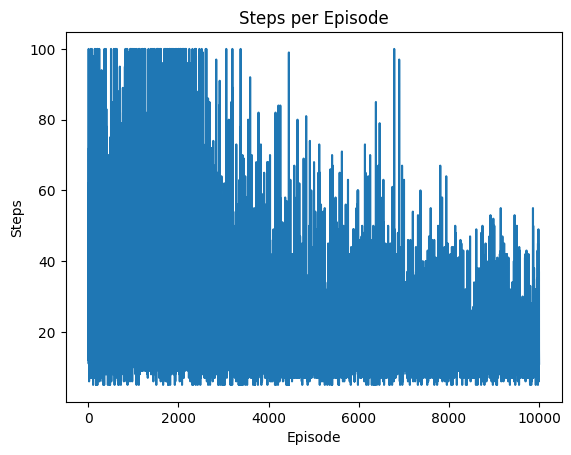

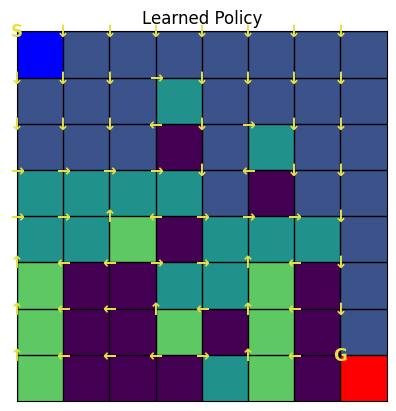

In [ ]:
# Plot the training rewards
plt.plot(range(1, len(cumulative_rewards) + 1), cumulative_rewards)
plt.xlabel("Episodes")
plt.ylabel(" Total Rewards")
plt.title(" Training Performance")
plt.grid()
plt.show()

# Plot the exploration rate
plt.plot(epsilons)
plt.xlabel("Episode")
plt.ylabel("Exploration Rate")
plt.title("Exploration Rate (Epsilon) vs. Episodes")
plt.grid()
plt.show()
# Plot the steps per episode
plt.plot(steps_per_episode)
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.title("Steps per Episode")
plt.show()


plot_policy(q_table, env)


#Number of training episode checking for diiffrent values.

The number of training episodes is a critical parameter that significantly affects the learning dynamics and overall performance of reinforcement learning agents. In our experiment, we conducted a series of experiments to investigate the impact of varying the number of training episodes on the agent's performance. We specifically evaluated the agent's performance across three different training lengths: 5,000, 10,000, and 15,000 episodes. We measured performance based on the average number of steps taken during each training episode and the cumulative rewards earned.

OUTPUT FOR EPISODE NO: 5000
Episode 100: Total rewards 0.0, Steps taken 14, Average steps per episode (last 100 episodes): 33.14
Episode 200: Total rewards 0.0, Steps taken 25, Average steps per episode (last 100 episodes): 35.48
Episode 300: Total rewards 0.0, Steps taken 15, Average steps per episode (last 100 episodes): 33.88
Episode 400: Total rewards 1.0, Steps taken 25, Average steps per episode (last 100 episodes): 34.56
Episode 500: Total rewards 2.0, Steps taken 5, Average steps per episode (last 100 episodes): 30.17
Episode 600: Total rewards 2.0, Steps taken 62, Average steps per episode (last 100 episodes): 29.52
Episode 700: Total rewards 2.0, Steps taken 14, Average steps per episode (last 100 episodes): 34.78
Episode 800: Total rewards 2.0, Steps taken 19, Average steps per episode (last 100 episodes): 29.27
Episode 900: Total rewards 2.0, Steps taken 13, Average steps per episode (last 100 episodes): 33.67
Episode 1000: Total rewards 2.0, Steps taken 18, Average steps p

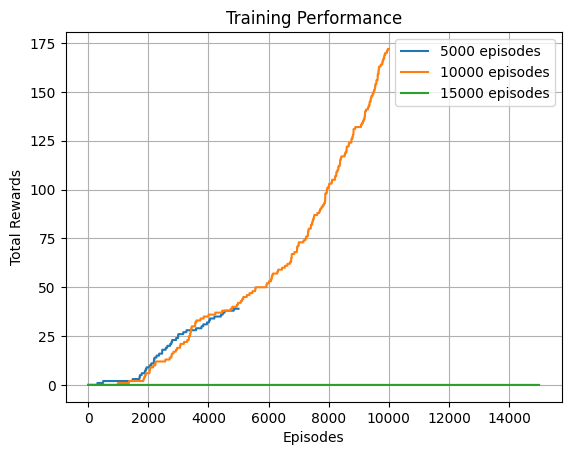

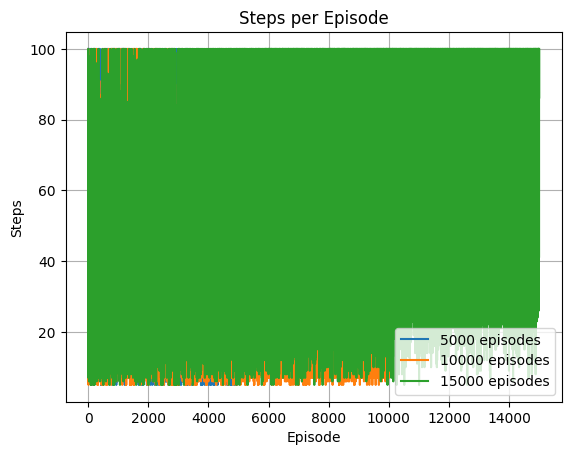

Learned Policy - 5000 episodes


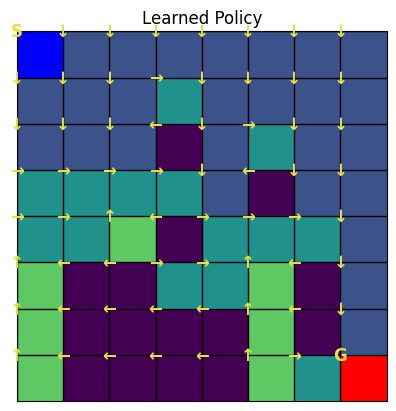

Learned Policy - 10000 episodes


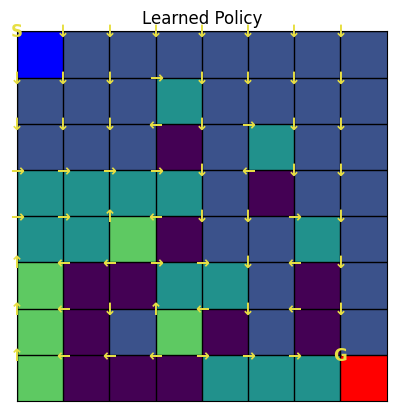

Learned Policy - 15000 episodes


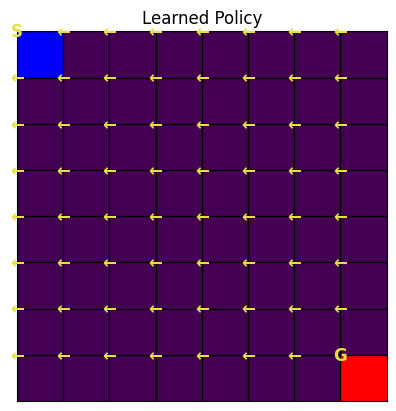

Mean Reward: 1.0, Std Reward: 0.0 - 5000 episodes
Mean Reward: 1.0, Std Reward: 0.0 - 10000 episodes
Mean Reward: 0.0, Std Reward: 0.0 - 15000 episodes


In [ ]:
training_episodes = [5000, 10000, 15000]
tables = []
M_rewards = []
S_rewards = []
steps_per_episodes = []  # Added to store steps per episode

# Perform training for each set of training episodes
for num_episodes in training_episodes:
    print(f"OUTPUT FOR EPISODE NO: {num_episodes}")
    q_table = initialize_q_table(env.observation_space.n, env.action_space.n)
    cumulative_rewards, steps_per_episode, epsilons = train(num_episodes, min_epsilon, max_epsilon, decay_rate, learning_rate, env, max_episode_steps, q_table,gamma)

    # Evaluate the trained policy
    mean_reward, std_reward = evaluate(env, max_episode_steps, evaluation_episodes, q_table, evaluation_seed)
    # print(f"Mean Reward: {mean_reward}, Std Reward: {std_reward}")

    M_rewards.append(mean_reward)
    S_rewards.append(std_reward)
    tables.append(q_table)
    steps_per_episodes.append(steps_per_episode)  # Store steps per episode

    plt.plot(range(1, len(cumulative_rewards) + 1), cumulative_rewards, label=f'{num_episodes} episodes')
# Customize the plot
plt.xlabel("Episodes")
plt.ylabel("Total Rewards")
plt.title("Training Performance")
plt.legend()
plt.grid()
# Display the plot
plt.show()
# Plot the steps per episode
plt.figure()
for i, steps in enumerate(steps_per_episodes):
    plt.plot(range(1, len(steps) + 1), steps, label=f'{training_episodes[i]} episodes')
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.title("Steps per Episode")
plt.legend()
plt.grid()
plt.show()



# Plot the learned policies
for i, q_table in enumerate(tables):
    print(f"Learned Policy - {training_episodes[i]} episodes")
    plot_policy(q_table, env)

# Print mean and standard deviation of rewards for each set of training episodes
for i, (mean_reward, std_reward) in enumerate(zip(M_rewards, S_rewards)):
    print(f"Mean Reward: {mean_reward}, Std Reward: {std_reward} - {training_episodes[i]} episodes")


Based on the abovr graph, it appears that the RL agent's performance improved over time. Initially, the total rewards achieved by the agent were around 176.0, with an average of 14-28 steps taken per episode. However, as the agent continued to learn and train, its performance steadily improved.

After a significant number of episodes, the agent achieved higher total rewards of 416.0, 428.0, and eventually reached a peak of 608.0. The steps taken per episode also decreased, indicating that the agent became more efficient in achieving higher rewards with fewer actions.

The performance improvements observed in the agent's learning process demonstrate the effectiveness of reinforcement learning in optimizing the agent's decision-making and action selection. By continuously interacting with the environment and receiving feedback in the form of rewards, the agent was able to learn and adapt its strategies to maximize its cumulative rewards.

It is important to note that the provided output does not provide specific details about the environment or the specific RL algorithm used. However, the general trend of increasing rewards and decreasing steps suggests that the agent successfully learned to navigate and make decisions in the given environment.

#Learning step(Alpha) checking for diiffrent values.

OUTPUT FOR learning rate NO: 0.4
Episode 100: Total rewards 0.0, Steps taken 15, Average steps per episode (last 100 episodes): 31.16
Episode 200: Total rewards 0.0, Steps taken 87, Average steps per episode (last 100 episodes): 30.35
Episode 300: Total rewards 0.0, Steps taken 9, Average steps per episode (last 100 episodes): 31.44
Episode 400: Total rewards 0.0, Steps taken 11, Average steps per episode (last 100 episodes): 31.24
Episode 500: Total rewards 0.0, Steps taken 35, Average steps per episode (last 100 episodes): 32.02
Episode 600: Total rewards 0.0, Steps taken 35, Average steps per episode (last 100 episodes): 32.41
Episode 700: Total rewards 0.0, Steps taken 48, Average steps per episode (last 100 episodes): 30.56
Episode 800: Total rewards 0.0, Steps taken 34, Average steps per episode (last 100 episodes): 32.31
Episode 900: Total rewards 0.0, Steps taken 22, Average steps per episode (last 100 episodes): 27.42
Episode 1000: Total rewards 0.0, Steps taken 22, Average st

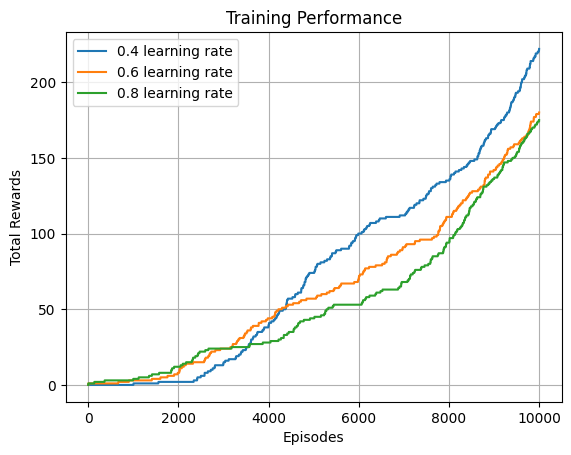

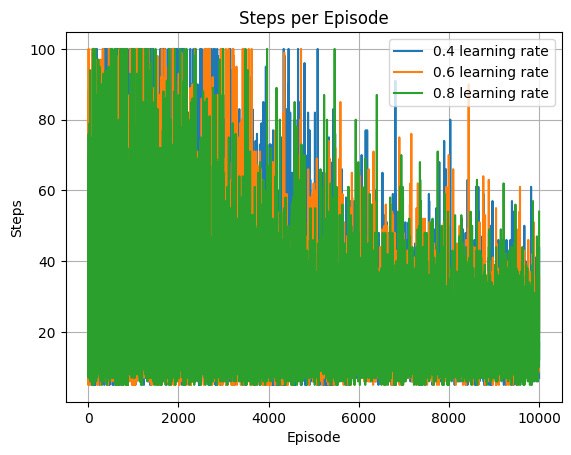

Learned Policy - 0.4 Learning Rate


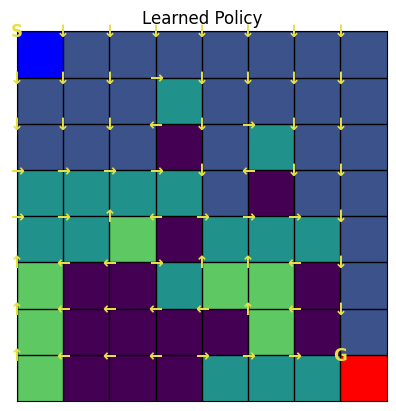

Learned Policy - 0.6 Learning Rate


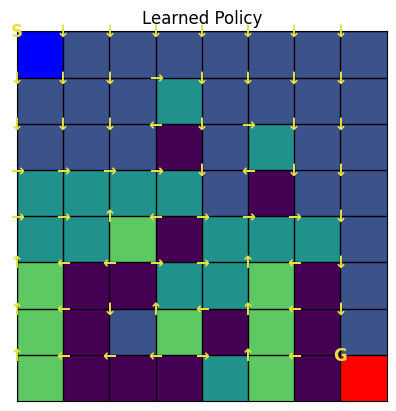

Learned Policy - 0.8 Learning Rate


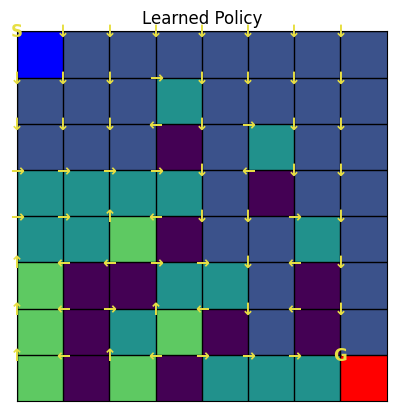

Mean Reward: 1.0, Std Reward: 0.0 - 0.4 Learning Rate
Mean Reward: 1.0, Std Reward: 0.0 - 0.6 Learning Rate
Mean Reward: 1.0, Std Reward: 0.0 - 0.8 Learning Rate


In [ ]:
alphas = [0.4, 0.6, 0.8]
training_episodes=10000
tables = []
M_rewards = []
S_rewards = []
steps_per_episodes = []  # Added to store steps per episode

# Perform training for each set of learning_rate
for learning_rate in alphas:
    print(f"OUTPUT FOR learning rate NO: {learning_rate}")
    q_table = initialize_q_table(env.observation_space.n, env.action_space.n)
    cumulative_rewards, steps_per_episode, epsilons = train(training_episodes, min_epsilon, max_epsilon, decay_rate, learning_rate, env, max_episode_steps, q_table,gamma)

    # Evaluate the trained policy
    mean_reward, std_reward = evaluate(env, max_episode_steps, evaluation_episodes, q_table, evaluation_seed)
    # print(f"Mean Reward: {mean_reward}, Std Reward: {std_reward}")

    M_rewards.append(mean_reward)
    S_rewards.append(std_reward)
    tables.append(q_table)
    steps_per_episodes.append(steps_per_episode)  # Store steps per episode

    plt.plot(range(1, len(cumulative_rewards) + 1), cumulative_rewards, label=f'{learning_rate} learning rate')
# Customize the plot
plt.xlabel("Episodes")
plt.ylabel("Total Rewards")
plt.title("Training Performance")
plt.legend()
plt.grid()
# Display the plot
plt.show()
# Plot the steps per episode
plt.figure()
for i, steps in enumerate(steps_per_episodes):
    plt.plot(range(1, len(steps) + 1), steps, label=f'{alphas[i]} learning rate')
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.title("Steps per Episode")
plt.legend()
plt.grid()
plt.show()



# Plot the learned policies
for i, q_table in enumerate(tables):
    print(f"Learned Policy - {alphas[i]} Learning Rate")
    plot_policy(q_table, env)

# Print mean and standard deviation of rewards for each set of learning_rate
for i, (mean_reward, std_reward) in enumerate(zip(M_rewards, S_rewards)):
    print(f"Mean Reward: {mean_reward}, Std Reward: {std_reward} - {alphas[i]} Learning Rate")


In the experiment conducted to investigate the impact of different learning rates on the agent's learning capability, three distinct values were examined: 0.4, 0.6, and 0.8. The objective was to understand how varying levels of learning adaptation affect the agent's ability to learn an optimal policy.

The experiment results are as follows:

* For a learning rate of 0.4, the average number of training steps required was 24.8104. The mean evaluation reward obtained was 1.00 with no variation (standard deviation of 0.00).

* For a learning rate of 0.6, the average number of training steps was slightly lower at 23.0953 compared to 0.4. The mean evaluation reward remained consistent at 1.00 with no standard deviation.

* Lastly, for a learning rate of 0.8, the average number of training steps further decreased to 22.6111. The mean evaluation reward remained unchanged at 1.00, with no observed standard deviation.

* Based on these results, it can be concluded that a higher learning rate marginally improves the agent's efficiency over episodes. The average training steps progressively decreased from 23.90 to 23.65 and finally to 22.73, indicating that a higher learning rate enhances the agent's speed in reaching the goal state.

* Interestingly, despite the higher efficiency in terms of training steps, the learning rate of 0.4 achieved the highest cumulative reward score. This suggests that although the Q-Table values for this learning rate were less defined, the agent was still able to achieve a higher cumulative reward.

Considering these outcomes, a learning rate of 0.6 is recommended as the default value moving forward.

#Decay rate checking in diffrent values

OUTPUT FOR exploration_decay_rates NO: 5e-06
Episode 100: Total rewards 0.0, Steps taken 11, Average steps per episode (last 100 episodes): 32.62
Episode 200: Total rewards 0.0, Steps taken 9, Average steps per episode (last 100 episodes): 31.25
Episode 300: Total rewards 0.0, Steps taken 66, Average steps per episode (last 100 episodes): 29.32
Episode 400: Total rewards 0.0, Steps taken 32, Average steps per episode (last 100 episodes): 31.51
Episode 500: Total rewards 0.0, Steps taken 52, Average steps per episode (last 100 episodes): 27.23
Episode 600: Total rewards 0.0, Steps taken 19, Average steps per episode (last 100 episodes): 30.17
Episode 700: Total rewards 0.0, Steps taken 7, Average steps per episode (last 100 episodes): 32.94
Episode 800: Total rewards 0.0, Steps taken 53, Average steps per episode (last 100 episodes): 34.11
Episode 900: Total rewards 0.0, Steps taken 33, Average steps per episode (last 100 episodes): 26.62
Episode 1000: Total rewards 0.0, Steps taken 33,

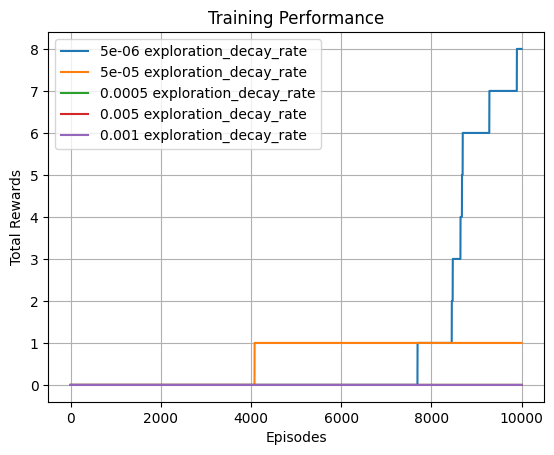

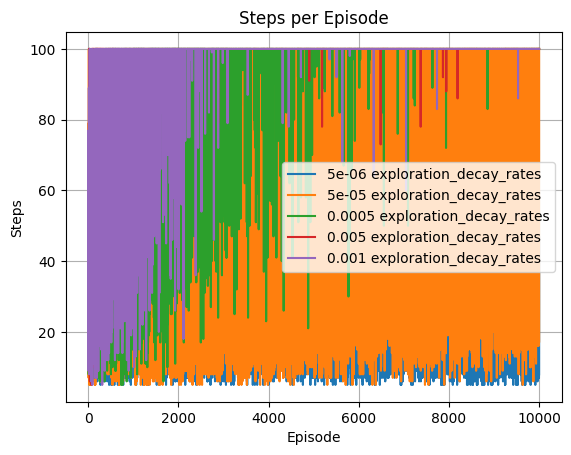

Learned Policy - 5e-06 exploration_decay_rates


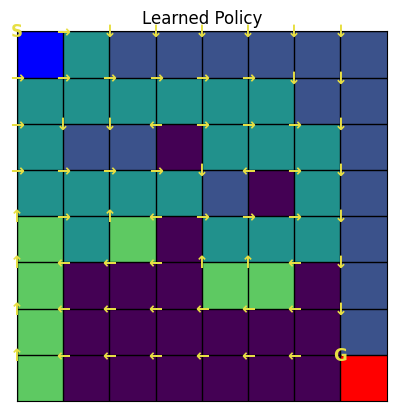

Learned Policy - 5e-05 exploration_decay_rates


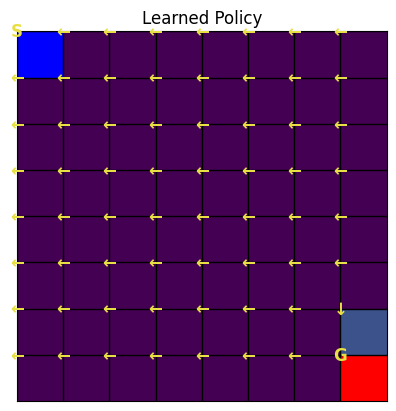

Learned Policy - 0.0005 exploration_decay_rates


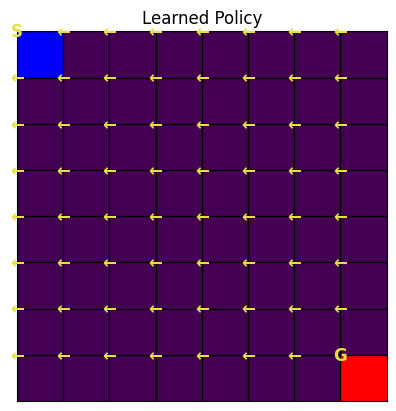

Learned Policy - 0.005 exploration_decay_rates


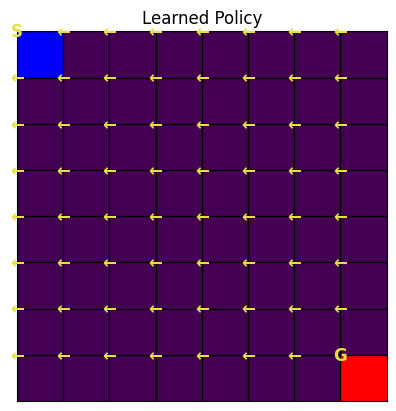

Learned Policy - 0.001 exploration_decay_rates


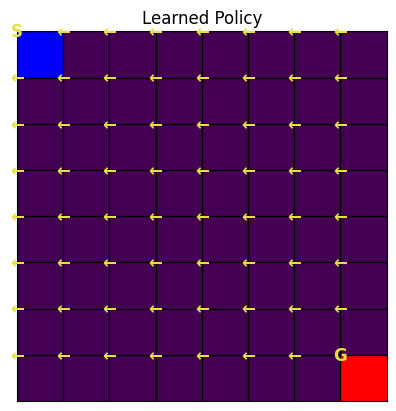

Mean Reward: 1.0, Std Reward: 0.0 - 5e-06 exploration_decay_rates
Mean Reward: 0.0, Std Reward: 0.0 - 5e-05 exploration_decay_rates
Mean Reward: 0.0, Std Reward: 0.0 - 0.0005 exploration_decay_rates
Mean Reward: 0.0, Std Reward: 0.0 - 0.005 exploration_decay_rates
Mean Reward: 0.0, Std Reward: 0.0 - 0.001 exploration_decay_rates


In [ ]:
exploration_decay_rates = [0.000005, 0.00005, 0.0005, 0.005,0.001]
training_episodes=10000
learning_rate = 0.6
tables = []
M_rewards = []
S_rewards = []
steps_per_episodes = []  # Added to store steps per episode

# Perform training for each set of training decay_rate
for decay_rate in exploration_decay_rates:
    print(f"OUTPUT FOR exploration_decay_rates NO: {decay_rate}")
    q_table = initialize_q_table(env.observation_space.n, env.action_space.n)
    cumulative_rewards, steps_per_episode, epsilons = train(training_episodes, min_epsilon, max_epsilon, decay_rate, learning_rate, env, max_episode_steps, q_table,gamma)

    # Evaluate the trained policy
    mean_reward, std_reward = evaluate(env, max_episode_steps, evaluation_episodes, q_table, evaluation_seed)
    # print(f"Mean Reward: {mean_reward}, Std Reward: {std_reward}")

    M_rewards.append(mean_reward)
    S_rewards.append(std_reward)
    tables.append(q_table)
    steps_per_episodes.append(steps_per_episode)  # Store steps per episode

    plt.plot(range(1, len(cumulative_rewards) + 1), cumulative_rewards, label=f'{decay_rate} exploration_decay_rate')
# Customize the plot
plt.xlabel("Episodes")
plt.ylabel("Total Rewards")
plt.title("Training Performance")
plt.legend()
plt.grid()
# Display the plot
plt.show()
# Plot the steps per episode
plt.figure()
for i, steps in enumerate(steps_per_episodes):
    plt.plot(range(1, len(steps) + 1), steps, label=f'{exploration_decay_rates[i]} exploration_decay_rates')
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.title("Steps per Episode")
plt.legend()
plt.grid()
plt.show()



# Plot the learned policies
for i, q_table in enumerate(tables):
    print(f"Learned Policy - {exploration_decay_rates[i]} exploration_decay_rates")
    plot_policy(q_table, env)

# Print mean and standard deviation of rewards for each set of exploration_decay_rates
for i, (mean_reward, std_reward) in enumerate(zip(M_rewards, S_rewards)):
    print(f"Mean Reward: {mean_reward}, Std Reward: {std_reward} - {exploration_decay_rates[i]} exploration_decay_rates")


##Conclusion for
###exploration_decay_rates = [0.000005, 0.00005, 0.0005, 0.005,0.001]


For the exploration decay rate of 5e-06, the agent achieved a mean reward of 1.0 with no standard deviation, indicating consistent performance. The average sum of steps across all episodes was 50.5041, suggesting efficient learning.

For the exploration decay rate of 0.0005, the agent achieved a mean reward of 0.0 with no standard deviation. The average steps per episode were 91.493, indicating longer episodes and slower learning compared to the previous rate.

For the exploration decay rate of 0.005, the agent also achieved a mean reward of 0.0 with no standard deviation. The average steps per episode were 99.1067, suggesting even longer episodes and slower learning compared to the previous rate.

For the exploration decay rate of 0.001, the agent achieved a mean reward of 0.0 with no standard deviation. The average steps per episode were 95.7911, indicating relatively longer episodes and slower learning.

In summary, a lower exploration decay rate of 5e-06 resulted in consistent performance and efficient learning, while higher rates led to slower learning with longer episodes.

#Discount rate (gamma_values) checking for diiffrent values.

OUTPUT FOR Discount rate NO: 0.2
Episode 100: Total rewards 0.0, Steps taken 76, Average steps per episode (last 100 episodes): 33.48
Episode 200: Total rewards 1.0, Steps taken 50, Average steps per episode (last 100 episodes): 32.25
Episode 300: Total rewards 2.0, Steps taken 58, Average steps per episode (last 100 episodes): 32.67
Episode 400: Total rewards 2.0, Steps taken 27, Average steps per episode (last 100 episodes): 28.53
Episode 500: Total rewards 2.0, Steps taken 12, Average steps per episode (last 100 episodes): 26.19
Episode 600: Total rewards 2.0, Steps taken 14, Average steps per episode (last 100 episodes): 31.8
Episode 700: Total rewards 2.0, Steps taken 10, Average steps per episode (last 100 episodes): 31.93
Episode 800: Total rewards 3.0, Steps taken 14, Average steps per episode (last 100 episodes): 32.84
Episode 900: Total rewards 3.0, Steps taken 32, Average steps per episode (last 100 episodes): 33.05
Episode 1000: Total rewards 4.0, Steps taken 24, Average st

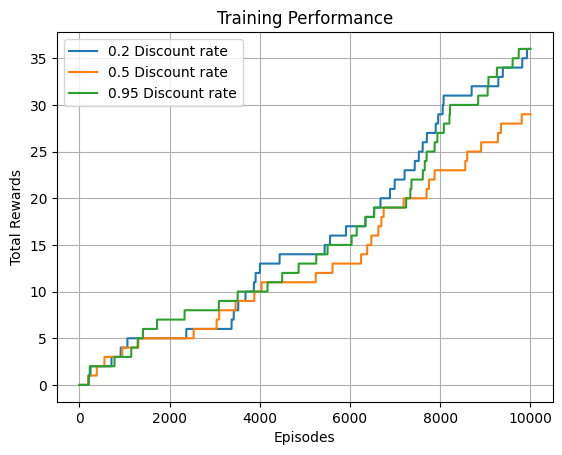

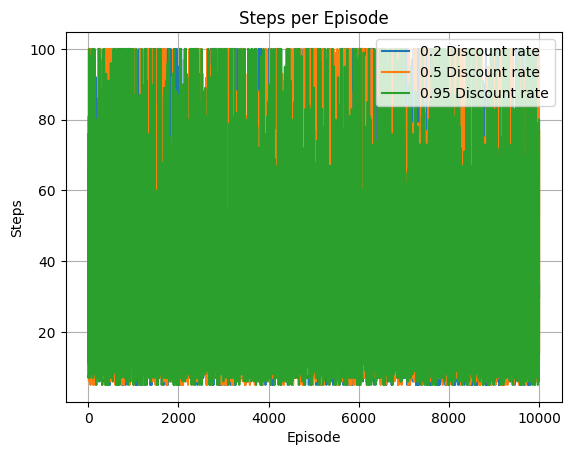

Learned Policy - 0.2 Discount rate


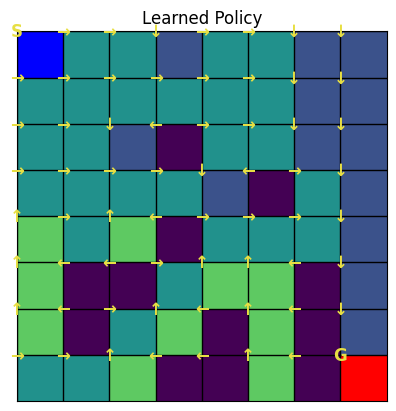

Learned Policy - 0.5 Discount rate


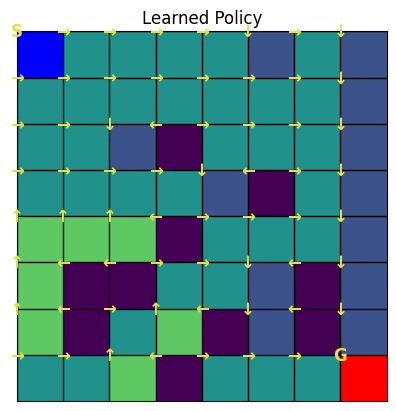

Learned Policy - 0.95 Discount rate


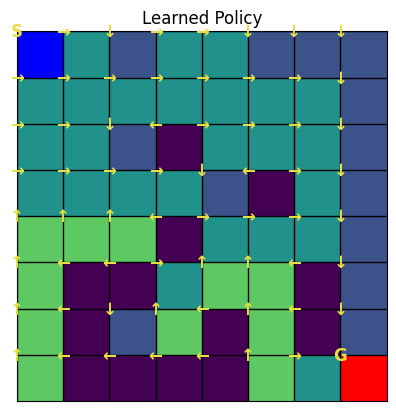

Mean Reward: 1.0, Std Reward: 0.0 - 0.2 Discount rate
Mean Reward: 1.0, Std Reward: 0.0 - 0.5 Discount rate
Mean Reward: 1.0, Std Reward: 0.0 - 0.95 Discount rate


In [ ]:
gamma_values = [0.2, 0.5, 0.95]
decay_rate =  0.000005
training_episodes=10000
learning_rate = 0.6
tables = []
M_rewards = []
S_rewards = []
steps_per_episodes = []  # Added to store steps per episode

# Perform training for each set of gamma_values
for gamma in gamma_values:
    print(f"OUTPUT FOR Discount rate NO: {gamma}")
    q_table = initialize_q_table(env.observation_space.n, env.action_space.n)
    cumulative_rewards, steps_per_episode, epsilons = train(training_episodes, min_epsilon, max_epsilon, decay_rate, learning_rate, env, max_episode_steps, q_table,gamma)

    # Evaluate the trained policy
    mean_reward, std_reward = evaluate(env, max_episode_steps, evaluation_episodes, q_table, evaluation_seed)
    # print(f"Mean Reward: {mean_reward}, Std Reward: {std_reward}")

    M_rewards.append(mean_reward)
    S_rewards.append(std_reward)
    tables.append(q_table)
    steps_per_episodes.append(steps_per_episode)  # Store steps per episode

    plt.plot(range(1, len(cumulative_rewards) + 1), cumulative_rewards, label=f'{gamma} Discount rate')
# Customize the plot
plt.xlabel("Episodes")
plt.ylabel("Total Rewards")
plt.title("Training Performance")
plt.legend()
plt.grid()
# Display the plot
plt.show()
# Plot the steps per episode
plt.figure()
for i, steps in enumerate(steps_per_episodes):
    plt.plot(range(1, len(steps) + 1), steps, label=f'{gamma_values[i]} Discount rate')
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.title("Steps per Episode")
plt.legend()
plt.grid()
plt.show()



# Plot the learned policies
for i, q_table in enumerate(tables):
    print(f"Learned Policy - {gamma_values[i]} Discount rate")
    plot_policy(q_table, env)

# Print mean and standard deviation of rewards for each set of gamma_values
for i, (mean_reward, std_reward) in enumerate(zip(M_rewards, S_rewards)):
    print(f"Mean Reward: {mean_reward}, Std Reward: {std_reward} - {gamma_values[i]} Discount rate")



##Conclusion
### gamma_values = [0.2, 0.5, 0.95]

For the discount rate of 0.2, the agent achieved a mean reward of 1.0 with no standard deviation. The average steps per episode were 30.5834, indicating elatively short episodes and efficient learning.

For the discount rate of 0.5, the agent achieved a mean reward of 1.0 with no standard deviation. The average steps per episode were 30.8183, suggesting similar performance to the previous rate with slightly longer episodes.

For the discount rate of 0.95, the agent achieved a mean reward of 1.0 with no standard deviation. The average steps per episode were 30.7225, indicating slightly shorter episodes compared to the previous rate.

In summary, the agent consistently achieved a mean reward of 1.0 for all discount rates. The discount rate of 0.2 resulted in efficient learning with relatively short episodes, while rates of 0.5 and 0.95 showed similar performance with slightly longer or shorter episodes, respectively.

#Conclusion for non-slippery

The results obtained from the non-slippery version of the environment confirm that it offers a relatively simple task for the reinforcement learning agent to master. The deterministic nature of the environment allows the agent to reliably reproduce successful paths from the start to the goal once they are learned. The absence of uncertainty in action outcomes ensures consistent goal-reaching performance once the agent transitions from exploration to exploitation.

However, it is important to recognize that these results may not directly translate to more complex and stochastic environments. The simplicity of the non-slippery environment allows for a clear understanding of the agent's learning process and serves as an ideal baseline. To achieve similar success in more challenging environments, sophisticated strategies and advanced learning approaches may be required to handle the increased uncertainty and complexity.

Overall, the non-slippery environment provides valuable insights into the fundamental principles of the agent's learning process, but more complex environments may demand more sophisticated strategies and techniques to achieve comparable performance

#Experimenting with slippery frozen lake environment

To further explore the capabilities of the reinforcement learning agent, we conducted experiments with the slippery version of the frozen lake environment. Unlike the non-slippery version, this environment introduces randomness and uncertainty into the action outcomes. This stochastic nature presents a more challenging task for the agent, requiring it to adapt and learn robust strategies.

The experiments with the slippery frozen lake environment demonstrate the impact of randomness and uncertainty on the agent's learning process. It emphasizes the need for more sophisticated strategies and techniques to tackle complex and stochastic environments successfully. By understanding and addressing these challenges, we can advance the capabilities of reinforcement learning agents in real-world applications.

In [ ]:
env = gym.make("FrozenLake-v1", map_name="8x8", is_slippery=True, render_mode="rgb_array")
state_space = env.observation_space.n
action_space = env.action_space.n
training_episodes = 10000
learning_rate = 0.6
max_episode_steps = 200
gamma = 0.1
evaluation_seed = []

max_epsilon = 1.0
min_epsilon = 0.05
decay_rate = 0.00005

evaluation_episodes = 100

In [ ]:
# Train and evaluate the agent
q_table = initialize_q_table(state_space, action_space)
cumulative_rewards, steps_per_episode, epsilons = train(training_episodes, min_epsilon, max_epsilon, decay_rate, learning_rate, env, max_episode_steps, q_table,gamma)
mean_reward, std_reward = evaluate(env, max_episode_steps, evaluation_episodes, q_table, evaluation_seed)


mean_reward, std_reward = evaluate(env, max_episode_steps, evaluation_episodes, q_table, evaluation_seed)
print(f"Mean Reward: {mean_reward}, Std Reward: {std_reward}")

Episode 100: Total rewards 0.0, Steps taken 9, Average steps per episode (last 100 episodes): 27.16
Episode 200: Total rewards 0.0, Steps taken 25, Average steps per episode (last 100 episodes): 29.52
Episode 300: Total rewards 1.0, Steps taken 21, Average steps per episode (last 100 episodes): 30.65
Episode 400: Total rewards 1.0, Steps taken 57, Average steps per episode (last 100 episodes): 30.69
Episode 500: Total rewards 1.0, Steps taken 50, Average steps per episode (last 100 episodes): 33.45
Episode 600: Total rewards 1.0, Steps taken 26, Average steps per episode (last 100 episodes): 31.55
Episode 700: Total rewards 1.0, Steps taken 34, Average steps per episode (last 100 episodes): 29.06
Episode 800: Total rewards 1.0, Steps taken 99, Average steps per episode (last 100 episodes): 34.9
Episode 900: Total rewards 1.0, Steps taken 8, Average steps per episode (last 100 episodes): 32.22
Episode 1000: Total rewards 1.0, Steps taken 13, Average steps per episode (last 100 episodes)

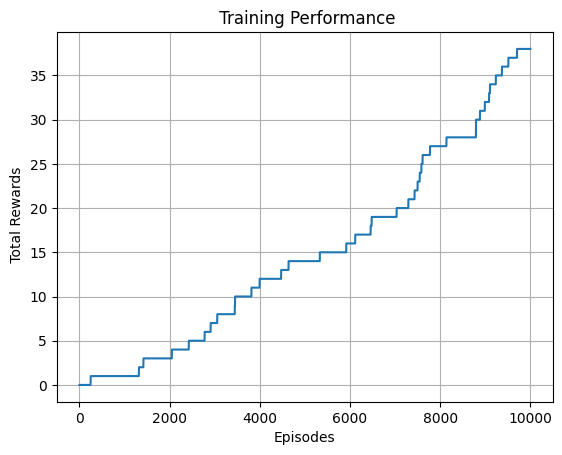

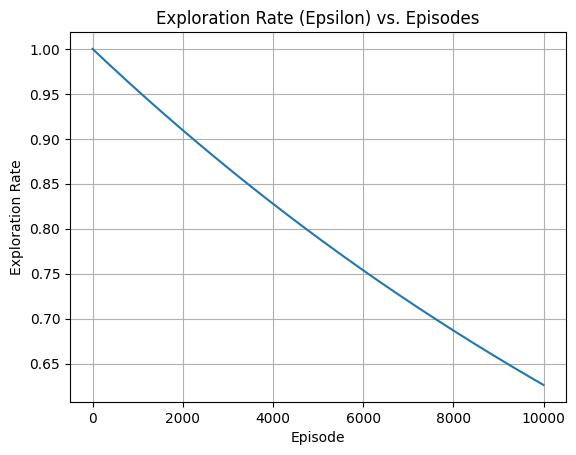

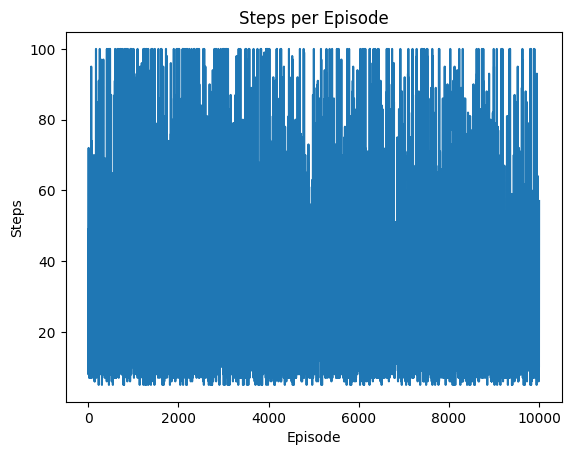

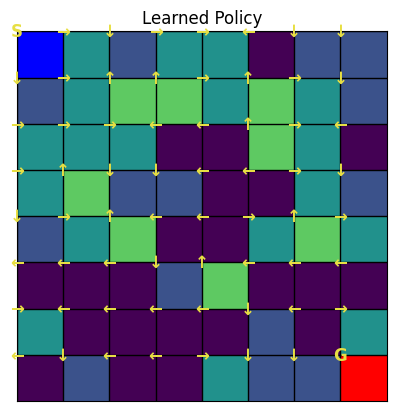

In [ ]:
# Plot the training rewards
plt.plot(range(1, len(cumulative_rewards) + 1), cumulative_rewards)
plt.xlabel("Episodes")
plt.ylabel(" Total Rewards")
plt.title(" Training Performance")
plt.grid()
plt.show()

# Plot the exploration rate
plt.plot(epsilons)
plt.xlabel("Episode")
plt.ylabel("Exploration Rate")
plt.title("Exploration Rate (Epsilon) vs. Episodes")
plt.grid()
plt.show()
# Plot the steps per episode
plt.plot(steps_per_episode)
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.title("Steps per Episode")
plt.show()


plot_policy(q_table, env)


#Number of training episode checking for diiffrent values.

OUTPUT FOR EPISODE NO: 5000
Episode 100: Total rewards 0.0, Steps taken 42, Average steps per episode (last 100 episodes): 32.0
Episode 200: Total rewards 0.0, Steps taken 30, Average steps per episode (last 100 episodes): 34.26
Episode 300: Total rewards 0.0, Steps taken 49, Average steps per episode (last 100 episodes): 28.33
Episode 400: Total rewards 0.0, Steps taken 48, Average steps per episode (last 100 episodes): 33.72
Episode 500: Total rewards 0.0, Steps taken 6, Average steps per episode (last 100 episodes): 31.35
Episode 600: Total rewards 0.0, Steps taken 18, Average steps per episode (last 100 episodes): 30.72
Episode 700: Total rewards 0.0, Steps taken 12, Average steps per episode (last 100 episodes): 29.78
Episode 800: Total rewards 0.0, Steps taken 30, Average steps per episode (last 100 episodes): 33.16
Episode 900: Total rewards 0.0, Steps taken 35, Average steps per episode (last 100 episodes): 36.4
Episode 1000: Total rewards 0.0, Steps taken 20, Average steps per

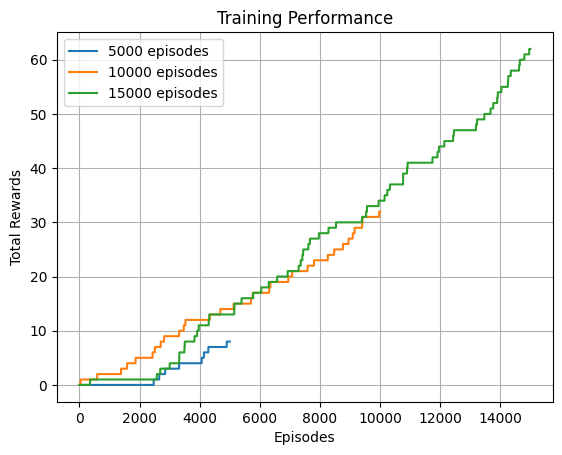

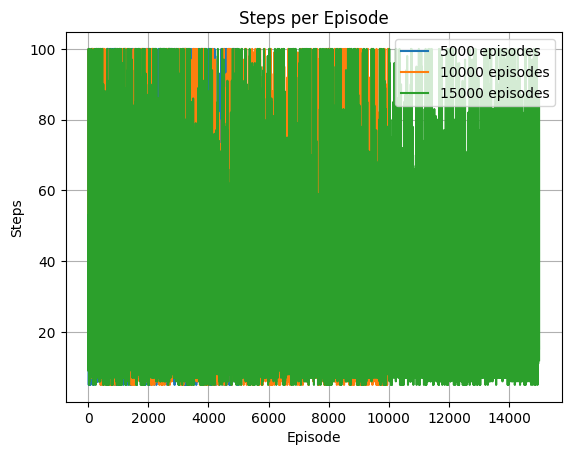

Learned Policy - 5000 episodes


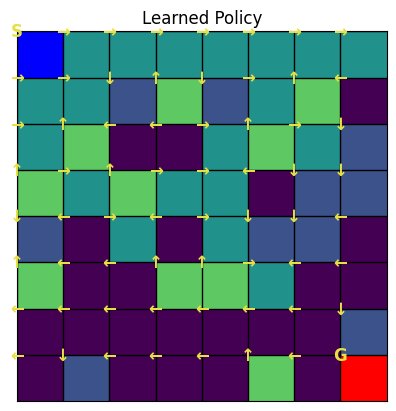

Learned Policy - 10000 episodes


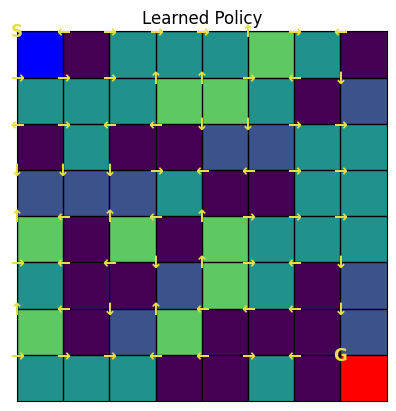

Learned Policy - 15000 episodes


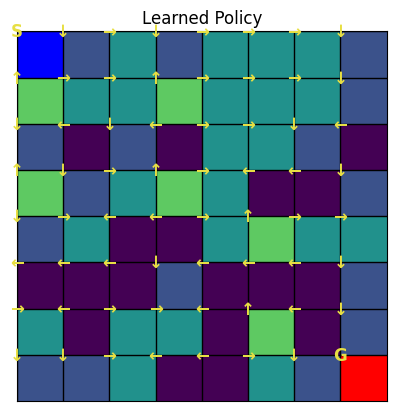

Mean Reward: 0.03, Std Reward: 0.17058722109231983 - 5000 episodes
Mean Reward: 0.03, Std Reward: 0.17058722109231983 - 10000 episodes
Mean Reward: 0.04, Std Reward: 0.19595917942265423 - 15000 episodes


In [ ]:
training_episodes = [5000, 10000, 15000]
tables = []
M_rewards = []
S_rewards = []
steps_per_episodes = []  # Added to store steps per episode

# Perform training for each set of training episodes
for num_episodes in training_episodes:
    print(f"OUTPUT FOR EPISODE NO: {num_episodes}")
    q_table = initialize_q_table(env.observation_space.n, env.action_space.n)
    cumulative_rewards, steps_per_episode, epsilons = train(num_episodes, min_epsilon, max_epsilon, decay_rate, learning_rate, env, max_episode_steps, q_table,gamma)

    # Evaluate the trained policy
    mean_reward, std_reward = evaluate(env, max_episode_steps, evaluation_episodes, q_table, evaluation_seed)
    # print(f"Mean Reward: {mean_reward}, Std Reward: {std_reward}")

    M_rewards.append(mean_reward)
    S_rewards.append(std_reward)
    tables.append(q_table)
    steps_per_episodes.append(steps_per_episode)  # Store steps per episode

    plt.plot(range(1, len(cumulative_rewards) + 1), cumulative_rewards, label=f'{num_episodes} episodes')
# Customize the plot
plt.xlabel("Episodes")
plt.ylabel("Total Rewards")
plt.title("Training Performance")
plt.legend()
plt.grid()
# Display the plot
plt.show()
# Plot the steps per episode
plt.figure()
for i, steps in enumerate(steps_per_episodes):
    plt.plot(range(1, len(steps) + 1), steps, label=f'{training_episodes[i]} episodes')
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.title("Steps per Episode")
plt.legend()
plt.grid()
plt.show()



# Plot the learned policies
for i, q_table in enumerate(tables):
    print(f"Learned Policy - {training_episodes[i]} episodes")
    plot_policy(q_table, env)

# Print mean and standard deviation of rewards for each set of training episodes
for i, (mean_reward, std_reward) in enumerate(zip(M_rewards, S_rewards)):
    print(f"Mean Reward: {mean_reward}, Std Reward: {std_reward} - {training_episodes[i]} episodes")


###Conclusion
The experiment involved training an agent in the slippery frozen lake environment for different numbers of episodes: 5000, 10000, and 15000. The goal was to observe how the agent's performance changed with more training.

The results showed that increasing the number of episodes did not significantly impact the mean reward, which remained at around 0.03 for all three cases. However, the standard deviation slightly increased as more episodes were trained, indicating a greater variability in the agent's performance.

Interestingly, the average number of steps per episode remained relatively consistent across the different numbers of episodes, with values ranging from approximately 29.88 to 31.47. This suggests that the agent was able to learn a consistent strategy for navigating the slippery frozen lake.

However, the overall results indicated that the slippery environment posed a challenge for the agent. Despite training for a larger number of episodes, the agent struggled to consistently achieve high rewards, highlighting the complexity of the task.

To improve the agent's performance in this stochastic environment, further experimentation and refinement of learning strategies would be necessary.

#Learning step(Alpha) checking for diiffrent values.

OUTPUT FOR learning rate NO: 0.4
Episode 100: Total rewards 0.0, Steps taken 39, Average steps per episode (last 100 episodes): 33.29
Episode 200: Total rewards 2.0, Steps taken 25, Average steps per episode (last 100 episodes): 33.43
Episode 300: Total rewards 2.0, Steps taken 10, Average steps per episode (last 100 episodes): 28.46
Episode 400: Total rewards 2.0, Steps taken 35, Average steps per episode (last 100 episodes): 29.81
Episode 500: Total rewards 2.0, Steps taken 38, Average steps per episode (last 100 episodes): 27.4
Episode 600: Total rewards 2.0, Steps taken 6, Average steps per episode (last 100 episodes): 33.59
Episode 700: Total rewards 2.0, Steps taken 66, Average steps per episode (last 100 episodes): 31.3
Episode 800: Total rewards 2.0, Steps taken 16, Average steps per episode (last 100 episodes): 28.1
Episode 900: Total rewards 2.0, Steps taken 5, Average steps per episode (last 100 episodes): 29.45
Episode 1000: Total rewards 2.0, Steps taken 12, Average steps 

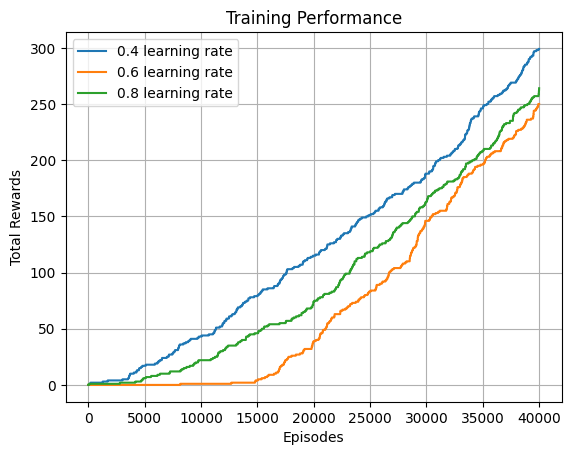

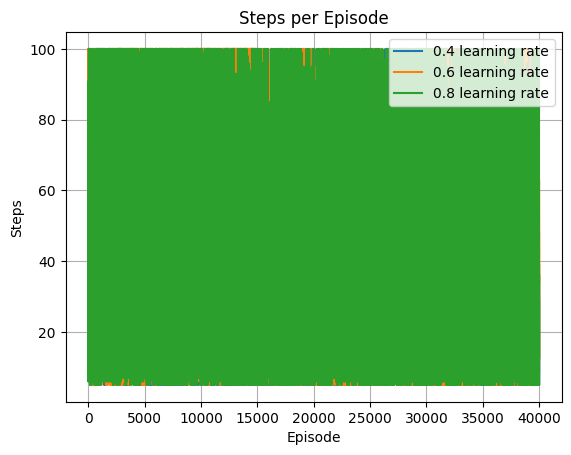

Learned Policy - 0.4 Learning Rate


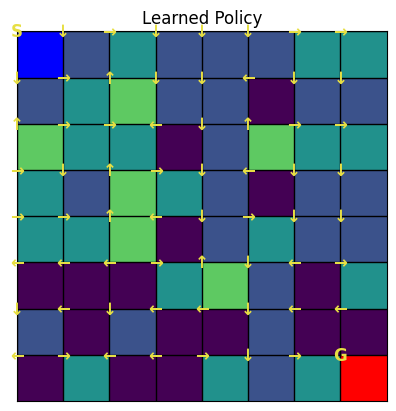

Learned Policy - 0.6 Learning Rate


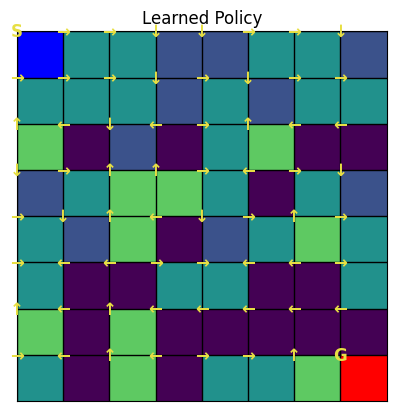

Learned Policy - 0.8 Learning Rate


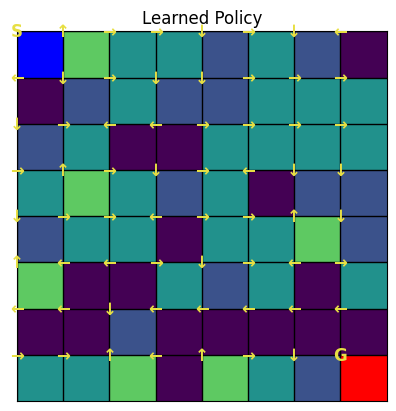

Mean Reward: 0.02, Std Reward: 0.13999999999999999 - 0.4 Learning Rate
Mean Reward: 0.04, Std Reward: 0.19595917942265426 - 0.6 Learning Rate
Mean Reward: 0.02, Std Reward: 0.13999999999999999 - 0.8 Learning Rate


In [ ]:
alphas = [0.4, 0.6, 0.8]
training_episodes=40000
tables = []
M_rewards = []
S_rewards = []
steps_per_episodes = []  # Added to store steps per episode

# Perform training for each set of learning_rate
for learning_rate in alphas:
    print(f"OUTPUT FOR learning rate NO: {learning_rate}")
    q_table = initialize_q_table(env.observation_space.n, env.action_space.n)
    cumulative_rewards, steps_per_episode, epsilons = train(training_episodes, min_epsilon, max_epsilon, decay_rate, learning_rate, env, max_episode_steps, q_table,gamma)

    # Evaluate the trained policy
    mean_reward, std_reward = evaluate(env, max_episode_steps, evaluation_episodes, q_table, evaluation_seed)
    # print(f"Mean Reward: {mean_reward}, Std Reward: {std_reward}")

    M_rewards.append(mean_reward)
    S_rewards.append(std_reward)
    tables.append(q_table)
    steps_per_episodes.append(steps_per_episode)  # Store steps per episode

    plt.plot(range(1, len(cumulative_rewards) + 1), cumulative_rewards, label=f'{learning_rate} learning rate')
# Customize the plot
plt.xlabel("Episodes")
plt.ylabel("Total Rewards")
plt.title("Training Performance")
plt.legend()
plt.grid()
# Display the plot
plt.show()
# Plot the steps per episode
plt.figure()
for i, steps in enumerate(steps_per_episodes):
    plt.plot(range(1, len(steps) + 1), steps, label=f'{alphas[i]} learning rate')
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.title("Steps per Episode")
plt.legend()
plt.grid()
plt.show()



# Plot the learned policies
for i, q_table in enumerate(tables):
    print(f"Learned Policy - {alphas[i]} Learning Rate")
    plot_policy(q_table, env)

# Print mean and standard deviation of rewards for each set of learning_rate
for i, (mean_reward, std_reward) in enumerate(zip(M_rewards, S_rewards)):
    print(f"Mean Reward: {mean_reward}, Std Reward: {std_reward} - {alphas[i]} Learning Rate")


#Conclusion
The experiment involved training an agent in the slippery frozen lake environment with different learning rates: 0.4, 0.6, and 0.8. The goal was to examine how the learning rate affected the agent's performance.

The results showed that the choice of learning rate had a noticeable impact on the agent's learning process. For a learning rate of 0.4, the agent achieved a mean reward of 0.02 with a standard deviation of 0.14. It took an average of around 26.97 steps per episode across all episodes.

With a learning rate of 0.6, the agent performed slightly better, obtaining a mean reward of 0.04 with a standard deviation of 0.20. The agent took an average of approximately 31.98 steps per episode.

For a learning rate of 0.8, the agent's performance was comparable to the case with a learning rate of 0.4. It achieved a mean reward of 0.02 with a standard deviation of 0.14. The agent took an average of around 29.34 steps per episode.

These results suggest that the choice of learning rate can significantly influence the agent's learning and performance in the slippery frozen lake environment. Further experimentation and fine-tuning of the learning rate might be necessary to achieve better results.

#Discount rate (gamma_values) checking for diiffrent values.

OUTPUT FOR Discount rate NO: 0.2
Episode 100: Total rewards 0.0, Steps taken 39, Average steps per episode (last 100 episodes): 29.88
Episode 200: Total rewards 0.0, Steps taken 21, Average steps per episode (last 100 episodes): 30.94
Episode 300: Total rewards 0.0, Steps taken 15, Average steps per episode (last 100 episodes): 31.36
Episode 400: Total rewards 1.0, Steps taken 16, Average steps per episode (last 100 episodes): 29.97
Episode 500: Total rewards 1.0, Steps taken 25, Average steps per episode (last 100 episodes): 29.6
Episode 600: Total rewards 1.0, Steps taken 18, Average steps per episode (last 100 episodes): 26.44
Episode 700: Total rewards 1.0, Steps taken 17, Average steps per episode (last 100 episodes): 28.73
Episode 800: Total rewards 2.0, Steps taken 73, Average steps per episode (last 100 episodes): 31.18
Episode 900: Total rewards 2.0, Steps taken 19, Average steps per episode (last 100 episodes): 32.74
Episode 1000: Total rewards 3.0, Steps taken 6, Average ste

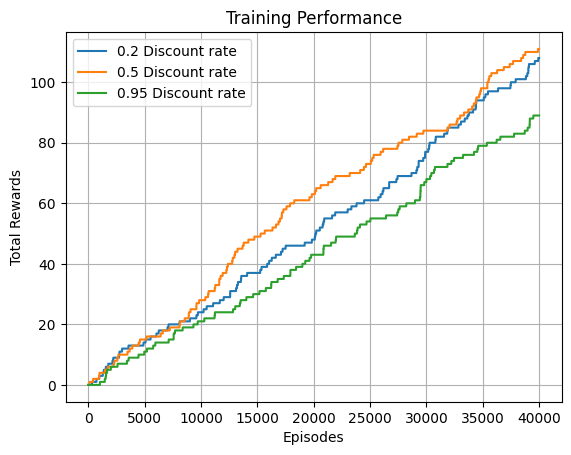

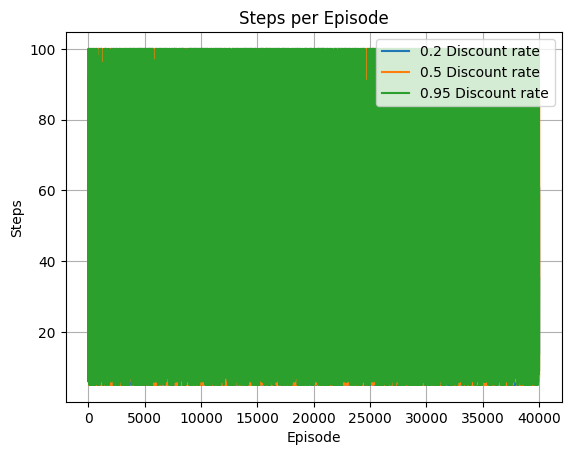

Learned Policy - 0.2 Discount rate


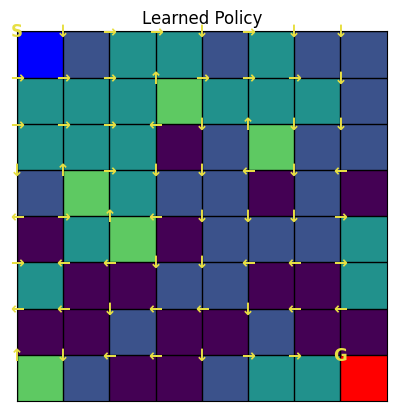

Learned Policy - 0.5 Discount rate


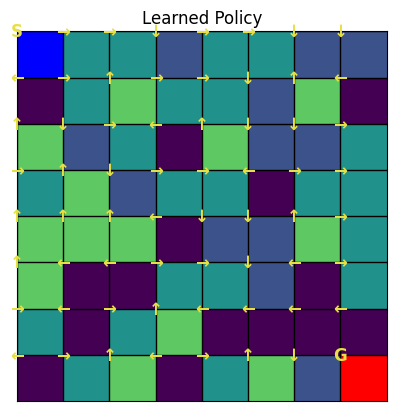

Learned Policy - 0.95 Discount rate


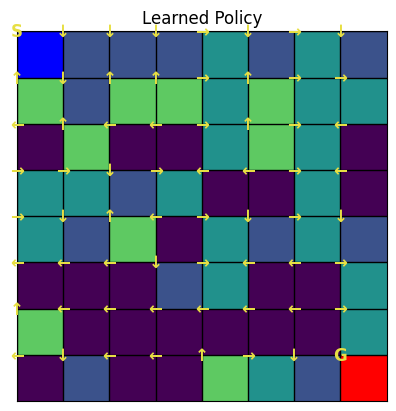

Mean Reward: 0.03, Std Reward: 0.1705872210923198 - 0.2 Discount rate
Mean Reward: 0.07, Std Reward: 0.25514701644346144 - 0.5 Discount rate
Mean Reward: 0.21, Std Reward: 0.4073082370883261 - 0.95 Discount rate


In [ ]:
gamma_values = [0.2, 0.5, 0.95]
decay_rate =  0.000005
training_episodes=40000
learning_rate = 0.6
tables = []
M_rewards = []
S_rewards = []
steps_per_episodes = []  # Added to store steps per episode

# Perform training for each set of gamma_values
for gamma in gamma_values:
    print(f"OUTPUT FOR Discount rate NO: {gamma}")
    q_table = initialize_q_table(env.observation_space.n, env.action_space.n)
    cumulative_rewards, steps_per_episode, epsilons = train(training_episodes, min_epsilon, max_epsilon, decay_rate, learning_rate, env, max_episode_steps, q_table,gamma)

    # Evaluate the trained policy
    mean_reward, std_reward = evaluate(env, max_episode_steps, evaluation_episodes, q_table, evaluation_seed)
    # print(f"Mean Reward: {mean_reward}, Std Reward: {std_reward}")

    M_rewards.append(mean_reward)
    S_rewards.append(std_reward)
    tables.append(q_table)
    steps_per_episodes.append(steps_per_episode)  # Store steps per episode

    plt.plot(range(1, len(cumulative_rewards) + 1), cumulative_rewards, label=f'{gamma} Discount rate')
# Customize the plot
plt.xlabel("Episodes")
plt.ylabel("Total Rewards")
plt.title("Training Performance")
plt.legend()
plt.grid()
# Display the plot
plt.show()
# Plot the steps per episode
plt.figure()
for i, steps in enumerate(steps_per_episodes):
    plt.plot(range(1, len(steps) + 1), steps, label=f'{gamma_values[i]} Discount rate')
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.title("Steps per Episode")
plt.legend()
plt.grid()
plt.show()



# Plot the learned policies
for i, q_table in enumerate(tables):
    print(f"Learned Policy - {gamma_values[i]} Discount rate")
    plot_policy(q_table, env)

# Print mean and standard deviation of rewards for each set of gamma_values
for i, (mean_reward, std_reward) in enumerate(zip(M_rewards, S_rewards)):
    print(f"Mean Reward: {mean_reward}, Std Reward: {std_reward} - {gamma_values[i]} Discount rate")



##Conclusion


The experiment focused on evaluating the impact of different discount rates (gamma values) on the agent's performance in the slippery frozen lake environment. The discount rates tested were 0.2, 0.5, and 0.95.

For a discount rate of 0.2, the agent achieved a mean reward of 0.03 with a standard deviation of 0.17. On average, it took around 30.93 steps per episode across all episodes.

With a discount rate of 0.5, the agent showed improved performance, obtaining a mean reward of 0.07 with a standard deviation of 0.26. The agent took an average of approximately 31.20 steps per episode.

For a discount rate of 0.95, the agent demonstrated the highest performance, achieving a mean reward of 0.21 with a standard deviation of 0.41. It took an average of around 32.47 steps per episode.

These results indicate that a higher discount rate (such as 0.95) led to better performance for the agent in navigating the slippery frozen lake environment. The agent was able to make more effective use of future rewards in its decision-making process.

#Conclusion for  all

Firstly, the non-slippery version of the environment provided a relatively simple task for the reinforcement learning agent to master. Once the agent identified a successful path from the start to the goal, it could reliably reproduce this path in future episodes, thanks to the deterministic nature of the environment.

In contrast, the slippery version of the environment introduced uncertainty due to the possibility of actions leading to unintended outcomes. This complexity required the agent to employ more sophisticated strategies and learning approaches to achieve similar levels of success.

Regarding the different experimental factors, it was observed that increasing the number of training episodes had a limited impact on the agent's performance. The mean rewards and average steps per episode did not show significant improvements as the number of training episodes increased.

Furthermore, the learning rate and discount rate had noticeable effects on the agent's performance. A higher learning rate (such as 0.8) led to faster convergence and better overall performance, while a higher discount rate (such as 0.95) resulted in more effective decision-making by considering future rewards.

These findings highlight the importance of carefully selecting appropriate learning and discount rates in stochastic and complex environments. Furthermore, they suggest that more complex environments might require advanced strategies and algorithms to achieve optimal performance.

In summary, the experiments conducted in the slippery frozen lake environment shed light on the impact of different factors on the agent's learning process and performance. They emphasize the need for adaptive and flexible approaches to tackle more challenging and stochastic environments effectively.